Example of how to load data and generate spectra for a given yield model

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#Set up notebook and load some R68 constants (V, eps, etc.)
exec(open("nb_setup.py").read())#Is there a better way to do this?
from constants import *

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


In [3]:
#Load the data
import R68_load as r68

meas=r68.load_measured()
g4=r68.load_G4()
cap=r68.load_simcap(file='/data/chocula/villaa/cascadeSimData/si28_R68_400k.pkl', rcapture=0.161)

Loading Measured Data...
PuBe events:  (476731,)
Bkg events:  (174636,)
Loading Geant4 Data...
(528848, 7)
(129555, 7)
Loading NRs...
1.1  min
Loading ERs...
0.3  min
Loading (n,gamma) Data...
400000


In [4]:
#Each returns a dictionary with relevant values
#print(meas)
#print(g4)
#print(cap)

In [5]:
#Import yield models
import R68_yield as Yield
import R68_spec_tools as spec

dict_keys(['xx', 'yy', 'ex', 'ey'])


In [6]:
Emax = 2000 #eVee
Ebins=np.linspace(0,Emax,201)
Ebin_ctr=(Ebins[:-1]+Ebins[1:])/2

In [17]:
Y=Yield.Yield('Lind',[0.15])

#DEFUNCT
#NR,ER,NG=spec.buildSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=True, seed=2)
#NRav,ERav,NGav=spec.buildAvgSimSpectra_ee(Ebins=Ebins, Evec_nr=g4['NR']['E'], Evec_er=g4['ER']['E'], Evec_ng=cap['E'], dEvec_ng=cap['dE'], Yield=Y, F_NR=2, scale_g4=1, scale_ng=1, doDetRes=True)

#ERs
N_er=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['ER']['E'], Yield=1.0, F=0, scale=1,\
                                   doDetRes=False, fpeak=1,doEffs=False)
#+Fano
N_er_wF=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['ER']['E'], Yield=1.0, F=F, scale=1,\
                                   doDetRes=False, fpeak=1,doEffs=False)
#+DetRes
N_er_wFD=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['ER']['E'], Yield=1.0, F=F, scale=1,\
                                   doDetRes=True, fpeak=1,doEffs=False)
#+NTL smear
N_er_wFDN=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['ER']['E'], Yield=1.0, F=F, scale=1,\
                                   doDetRes=True, fpeak=0.753,doEffs=False)

#NR
N_nr=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['NR']['E'], Yield=Y, F=0, scale=1,\
                                 doDetRes=False, fpeak=1,doEffs=False)
#+Fano
N_nr_wF=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['NR']['E'], Yield=Y, F=F, scale=1,\
                                 doDetRes=False, fpeak=1,doEffs=False)
#+Det
N_nr_wFD=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['NR']['E'], Yield=Y, F=F, scale=1,\
                                 doDetRes=True, fpeak=1,doEffs=False)
#+NTL smear
N_nr_wFDN=spec.buildAvgSimSpectrum_ee(Ebins=Ebins, Evec=g4['NR']['E'], Yield=Y, F=F, scale=1,\
                                 doDetRes=True, fpeak=0.753,doEffs=False)

In [33]:
#NGamma
N_ng=spec.buildAvgSimSpectrum_ee_composite(Ebins=Ebins, Evec=cap['E'], dEvec=cap['dE'], Yield=Y, F=0, scale=1,\
                                           doDetRes=False, fpeak=1,doEffs=False)
#+Fano
N_ng_wF=spec.buildAvgSimSpectrum_ee_composite(Ebins=Ebins, Evec=cap['E'], dEvec=cap['dE'], Yield=Y, F=F, scale=1,\
                                           doDetRes=False, fpeak=1,doEffs=False)
#+Det
N_ng_wFD=spec.buildAvgSimSpectrum_ee_composite(Ebins=Ebins, Evec=cap['E'], dEvec=cap['dE'], Yield=Y, F=F, scale=1,\
                                           doDetRes=True, fpeak=1,doEffs=False)
#+NTD smear
N_ng_wFDN=spec.buildAvgSimSpectrum_ee_composite(Ebins=Ebins, Evec=cap['E'], dEvec=cap['dE'], Yield=Y, F=F, scale=1,\
                                           doDetRes=True, fpeak=0.753,doEffs=False)

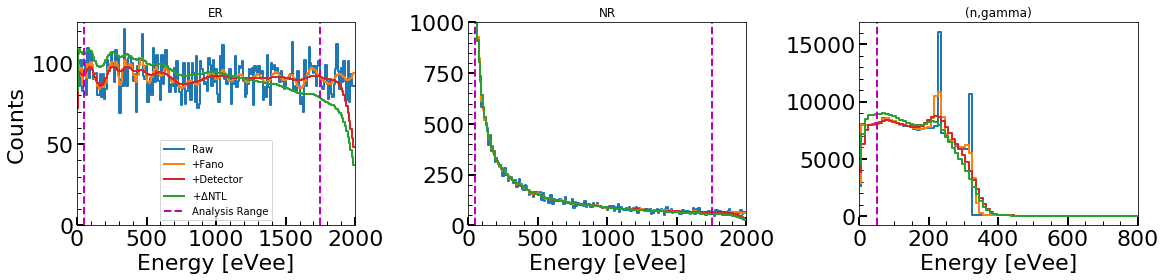

In [37]:
fig, ax = plt.subplots(1,3,figsize=(16.0,4.0),sharex=False)

ax[0].set_title('ER')
ax[0].step(Ebin_ctr,N_er,label='Raw')
ax[0].step(Ebin_ctr,N_er_wF,label='+Fano')
ax[0].step(Ebin_ctr,N_er_wFD,'C3',label='+Detector')
ax[0].step(Ebin_ctr,N_er_wFDN,'C2',label=r'+$\Delta$NTL')
ax[0].set_ylim(0,125)
ax[0].set_xlim(0,2e3)

ax[1].set_title('NR')
ax[1].step(Ebin_ctr,N_nr,label='Raw')
ax[1].step(Ebin_ctr,N_nr_wF,label='+Fano')
ax[1].step(Ebin_ctr,N_nr_wFD,'C3',label='+Detector')
ax[1].step(Ebin_ctr,N_nr_wFDN,'C2',label='+NTL')
ax[1].set_ylim(0,1e3)
ax[1].set_xlim(0,2e3)

ax[2].set_title('(n,gamma)')
ax[2].step(Ebin_ctr,N_ng,label='Raw')
ax[2].step(Ebin_ctr,N_ng_wF,label='+Fano')
ax[2].step(Ebin_ctr,N_ng_wFD,'C3',label='+Detector')
ax[2].step(Ebin_ctr,N_ng_wFDN,'C2',label='+NTL')
#ax[2].set_ylim(0,1e3)
ax[2].set_xlim(0,800)

for axi in ax:
    axi.axvline(50,linestyle='--',color='m',label='Analysis Range')
    axi.axvline(1750,linestyle='--',color='m')
    axi.set_xlabel('Energy [eVee]')

ax[0].legend()
ax[0].set_ylabel('Counts')

plt.tight_layout()
plt.savefig('figures/res_effects.png')

In [ ]:
###############OLD BELOW HERE#################

In [47]:
#Measured
N_meas_PuBe,_ = np.histogram(meas['PuBe']['E'],bins=Ebins)
N_meas_Bkg,_ = np.histogram(meas['Bkg']['E'],bins=Ebins)

R_meas_PuBe=N_meas_PuBe/meas['PuBe']['tlive']
R_meas_Bkg =N_meas_Bkg/meas['Bkg']['tlive']
R_meas = R_meas_PuBe-R_meas_Bkg
dR_meas = np.sqrt( N_meas_PuBe/(meas['PuBe']['tlive']**2) + N_meas_Bkg/(meas['Bkg']['tlive']**2) )

In [48]:
spec.plotSpectra(E_bins=Ebins, N_nr=NRav/g4['NR']['tlive'], N_er=ERav/g4['ER']['tlive'], 
                 N_ng=NGav/cap['tlive'], N_meas=R_meas, dN_meas=dR_meas , 
                 yrange=(0,1e-2), thresh=50)

NameError: name 'NRav' is not defined

2.969371078359842

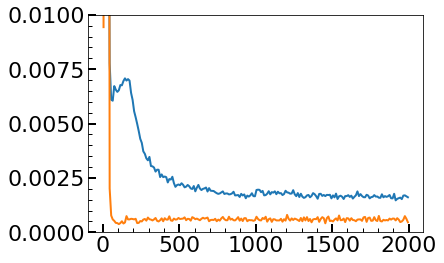

In [56]:
plt.plot(Ebin_ctr,R_meas_PuBe)
plt.plot(Ebin_ctr,R_meas_Bkg)
plt.ylim(0,0.01)

np.sum(R_meas_PuBe[Ebin_ctr>500])/np.sum(R_meas_Bkg[Ebin_ctr>500])
#This is roughly consistent with ratio of rates from randoms found here:
#https://zzz.physics.umn.edu/cdms/doku.php?id=cdms:k100:run_summary:run_68:run_68_rateandlivetime